In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

[STEP 1] Loading California Housing Dataset...

In [ ]:
housing = fetch_california_housing()

In [ ]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

In [ ]:
print(f"  - Shape: {df.shape}")
print(f"  - Features: {len(housing.feature_names)}")
print(f"\nDataset Info:")
print(df.info())

  - Shape: (20640, 9)
  - Features: 8

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


[STEP 2] Data Preprocessing

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


In [ ]:
if missing_values.sum() == 0:
    print(" No missing values found!")
else:
    # Fill missing values with median (for numerical data)
    df = df.fillna(df.median())

 No missing values found!


Basic Statistical Summary:

In [ ]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

✓ Saved: price_distribution.png


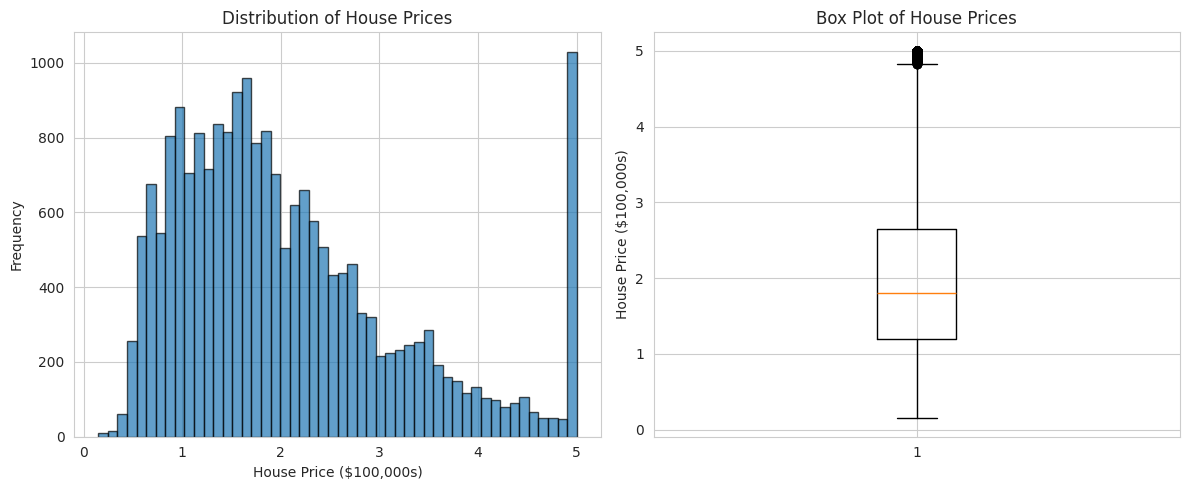


Correlation with Target Variable (Price):
Price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64

✓ Saved: correlation_matrix.png


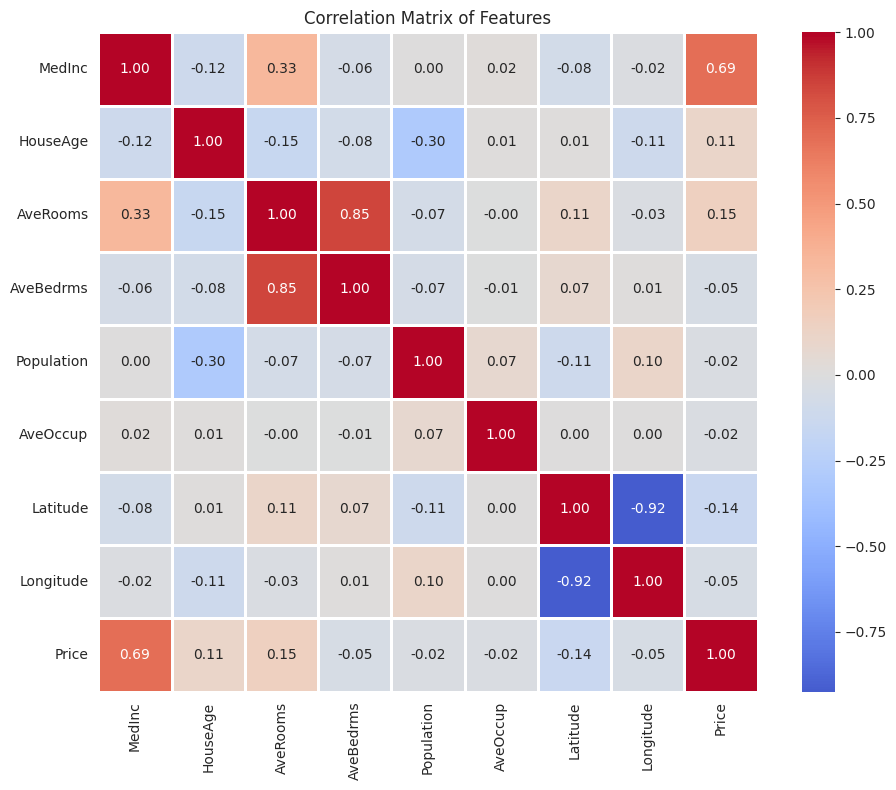

In [ ]:
# Distribution of target variable (Price)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('House Price ($100,000s)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

plt.subplot(1, 2, 2)
plt.boxplot(df['Price'])
plt.ylabel('House Price ($100,000s)')
plt.title('Box Plot of House Prices')

plt.tight_layout()
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Saved: price_distribution.png")
plt.show()

# Correlation matrix
print("\nCorrelation with Target Variable (Price):")
correlations = df.corr()['Price'].sort_values(ascending=False)
print(correlations)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: correlation_matrix.png")
plt.show()

STEP 4: PREPARE DATA FOR MODELING

In [ ]:
# Separate features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"  - Training set: {X_train.shape[0]} samples")
print(f"  - Testing set: {X_test.shape[0]} samples")


Features shape: (20640, 8)
Target shape: (20640,)
  - Training set: 16512 samples
  - Testing set: 4128 samples


STEP 5: TRAIN LINEAR REGRESSION MODEL


In [ ]:
# Initialize and train the model
model = LinearRegression()
print("\nTraining model...")
model.fit(X_train, y_train)
print("Model training complete!")

# Display model coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)
print(coefficients)
print(f"\nIntercept: {model.intercept_:.4f}")


Training model...
Model training complete!

Model Coefficients:
      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
1    HouseAge     0.009724
4  Population    -0.000002
5    AveOccup    -0.003526
2    AveRooms    -0.123323
6    Latitude    -0.419792
7   Longitude    -0.433708

Intercept: -37.0233


STEP 6: MAKE PREDICTIONS

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

TEP 7: MODEL EVALUATION

In [ ]:
# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("TRAINING SET PERFORMANCE:")
print(f"Mean Squared Error (MSE):  {train_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"R-squared (R²):            {train_r2:.4f}")

print("TEST SET PERFORMANCE:")
print(f"Mean Squared Error (MSE):  {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R²):            {test_r2:.4f}")

# Interpretation
print("INTERPRETATION:")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")
print(f"On average, predictions are off by ${test_rmse*100000:.2f}")


TRAINING SET PERFORMANCE:
Mean Squared Error (MSE):  0.5179
Root Mean Squared Error (RMSE): 0.7197
Mean Absolute Error (MAE): 0.5286
R-squared (R²):            0.6126
TEST SET PERFORMANCE:
Mean Squared Error (MSE):  0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R-squared (R²):            0.5758
INTERPRETATION:
The model explains 57.58% of the variance in house prices.
On average, predictions are off by $74558.14


STEP 8: VISUALIZATION OF RESULTS

✓ Saved: prediction_results.png


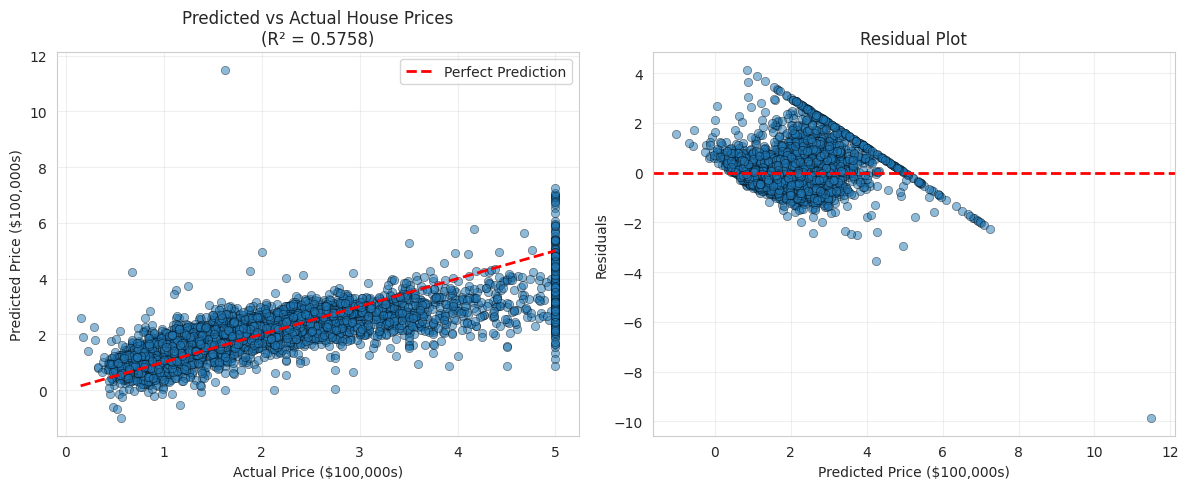

✓ Saved: feature_importance.png


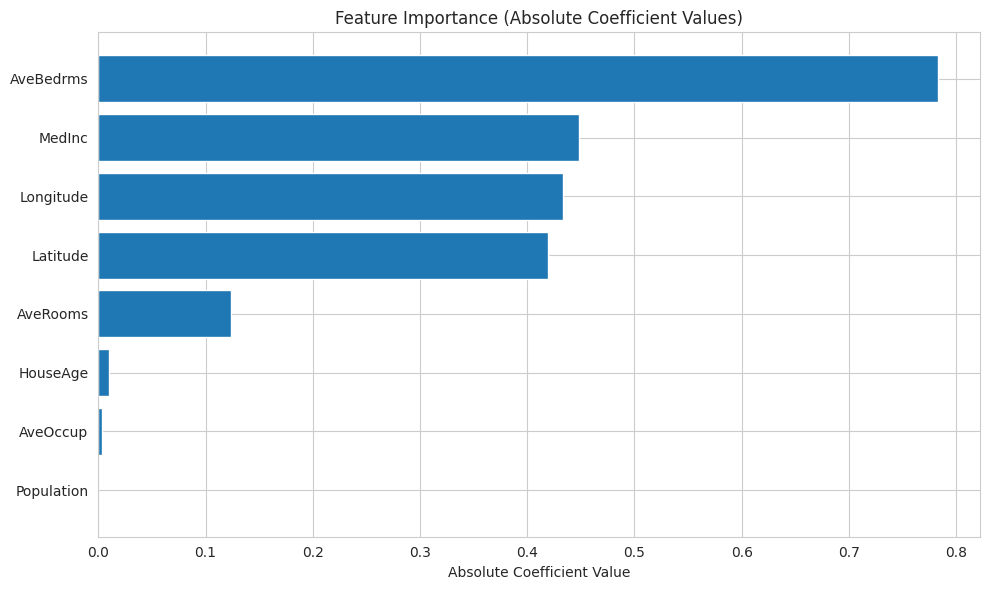

In [ ]:
# Plot 1: Predicted vs Actual (Test Set)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='k', linewidths=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($100,000s)')
plt.ylabel('Predicted Price ($100,000s)')
plt.title(f'Predicted vs Actual House Prices\n(R² = {test_r2:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_test_pred
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals, alpha=0.5, edgecolors='k', linewidths=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price ($100,000s)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('prediction_results.png', dpi=300, bbox_inches='tight')
print(" Saved: prediction_results.png")
plt.show()

# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print(" Saved: feature_importance.png")
plt.show()

STEP 9: ANALYSIS & CONCLUSIONS

In [ ]:
# Check for overfitting/underfitting
r2_diff = train_r2 - test_r2
if r2_diff > 0.1:
    print(" OVERFITTING DETECTED:")
    print(f"  Training R² ({train_r2:.4f}) >> Test R² ({test_r2:.4f})")
    print("  Recommendation: Consider regularization (Ridge/Lasso)")
elif test_r2 < 0.5:
    print(" UNDERFITTING DETECTED:")
    print(f"  Low R² score ({test_r2:.4f})")
    print("  Recommendation: Add polynomial features or use complex model")
else:
    print("MODEL PERFORMS REASONABLY WELL")
    print(f"  Minimal difference between training and test R²")

print(f"\n📈 Most Important Features:")
top_features = coefficients.head(3)
for idx, row in top_features.iterrows():
    print(f"  {idx+1}. {row['Feature']}: {row['Coefficient']:.4f}")

MODEL PERFORMS REASONABLY WELL
  Minimal difference between training and test R²

📈 Most Important Features:
  4. AveBedrms: 0.7831
  1. MedInc: 0.4487
  2. HouseAge: 0.0097
